# **Music Recommendation System**

**Importing Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
import json
from zipfile import ZipFile
import re

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

**Downloading Dataset from Kaggle & Extracting**

In [4]:
kaggle_config = json.load(open('kaggle.json'))

In [5]:
kaggle_config.keys()

dict_keys(['username', 'key'])

In [6]:
os.environ['KAGGLE_USERNAME'] = kaggle_config['username']
os.environ['KAGGLE_KEY'] = kaggle_config['key']

In [7]:
!kaggle datasets download notshrirang/spotify-million-song-dataset

Dataset URL: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset
License(s): CC0-1.0
spotify-million-song-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!ls

kaggle.json  spotify-million-song-dataset.zip
sample_data  spotify_millsongdata.csv


In [9]:
with ZipFile('spotify-million-song-dataset.zip', 'r') as zipObj:
    zipObj.extractall()

In [10]:
df = pd.read_csv("/content/spotify_millsongdata.csv")
df.shape

(57650, 4)

**Dataset Description & Information**

In [11]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [12]:
df.tail()

,artist,song,link,text
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...
57649,Zwan,Heartsong,/z/zwan/heartsong_20148991.html,come in \r\nmake yourself at home \r\ni'm a ...


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [14]:
df.isnull().sum()

,0
artist,0
song,0
link,0
text,0


In [15]:
top_artists = df['artist'].value_counts().head(10)
print("Top 10 Artists: ")
print(top_artists)

Top 10 Artists: 
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Alabama             187
Cher                187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


**Text Feature Extraction**

In [16]:
df = df.sample(10000)
df = df.drop('link', axis=1).reset_index(drop=True)

In [17]:
df.head(10)

,artist,song,text
0,Johnny Cash,I See A Darkness,"Well, you're my friend \r\nAnd you can see \..."
1,Reo Speedwagon,I Want To Know What Love Is,I gotta take a little time \r\nA little time ...
2,Kris Kristofferson,The Eagle And The Bear,I will fight and I will die for freedom up aga...
3,Kyla,I Feel For You,"Something inside, \r\nMy heart, \r\nAnd it f..."
4,Kanye West,I'll Fly Away,Some glad morning when this life is over \r\n...
5,Point Of Grace,Any Way,"Setting out, what a child, my steps ahead of m..."
6,Barbra Streisand,I Like Him,"I like him, I like him, \r\nHow strange the f..."
7,Neil Diamond,Don't Turn Around,If you want to leave \r\nI won't beg you to s...
8,Idina Menzel,Better To Have Loved,Better To Have Loved \r\nOoh \r\nBetter To H...
9,Utada Hikaru,Animato,Somebody out there better get this \r\nNot ma...


In [18]:
df.shape

(10000, 3)

In [19]:
all_lyrics = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics)

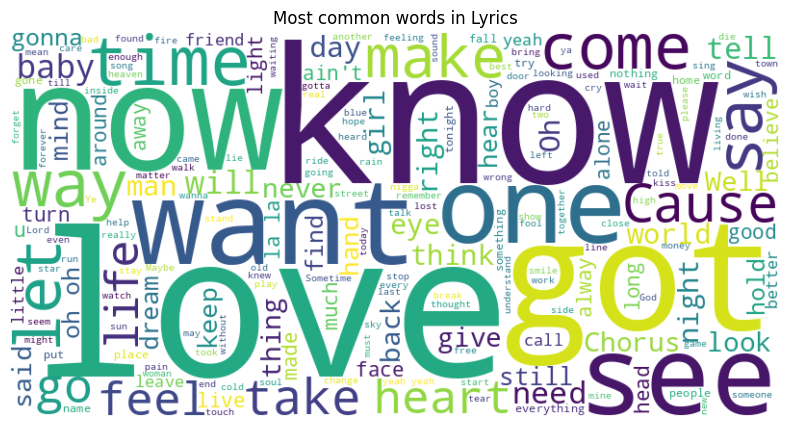

In [20]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most common words in Lyrics")
plt.show()

In [21]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
stop_words = set(stopwords.words('english'))

In [23]:
def preprocess_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower()
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    preprocessed_text = " ".join(filtered_tokens)
    return preprocessed_text

In [24]:
df['processed_text'] = df['text'].apply(preprocess_text)

In [25]:
df.head(10)

,artist,song,text,processed_text
0,Johnny Cash,I See A Darkness,"Well, you're my friend \r\nAnd you can see \...",well youre friend see may times weve drinking ...
1,Reo Speedwagon,I Want To Know What Love Is,I gotta take a little time \r\nA little time ...,got ta take little time little time think thin...
2,Kris Kristofferson,The Eagle And The Bear,I will fight and I will die for freedom up aga...,fight die freedom eagle bear help brother well...
3,Kyla,I Feel For You,"Something inside, \r\nMy heart, \r\nAnd it f...",something inside heart feels like magic changi...
4,Kanye West,I'll Fly Away,Some glad morning when this life is over \r\n...,glad morning life ill fly away home gods celes...
5,Point Of Grace,Any Way,"Setting out, what a child, my steps ahead of m...",setting child steps ahead mind doubt til knock...
6,Barbra Streisand,I Like Him,"I like him, I like him, \r\nHow strange the f...",like like strange feeling like never dreamed c...
7,Neil Diamond,Don't Turn Around,If you want to leave \r\nI won't beg you to s...,want leave wont beg stay got ta go darlin mayb...
8,Idina Menzel,Better To Have Loved,Better To Have Loved \r\nOoh \r\nBetter To H...,better loved ooh better loved ooh sun went tom...
9,Utada Hikaru,Animato,Somebody out there better get this \r\nNot ma...,somebody better get many people like speakers ...


**Tf-Idf and Cosine Similarity**

In [26]:
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['processed_text'])

In [27]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

**Songs Recommendations**

In [28]:
def recommend_songs(song_title, cosine_sim=cosine_sim, num_recommendations=5):
    song_index = df[df['song'].str.lower() == song_title.lower()].index
    if len(song_index) == 0:
        return "Song not found in the dataset!"
    song_index = song_index[0]

    similarity_scores = list(enumerate(cosine_sim[song_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:num_recommendations+1]

    song_indices = [i[0] for i in similarity_scores]
    recommended_songs = df[['song', 'artist']].iloc[song_indices]
    return recommended_songs

In [31]:
songs = recommend_songs("Better To Have Loved")
print(songs)

                    song            artist
7077        Marble Halls              Enya
29       Better Together     Fifth Harmony
6678  Do You Feel Loved?                U2
6058      You Were Loved   Whitney Houston
9035   Isn't This Better  Barbra Streisand


In [32]:
songs = recommend_songs("love me like you do")
print(songs)

                                      song           artist
2463  Don't Let Him Take Your Love From Me  The Temptations
9471                             I Like It     Depeche Mode
9498                            I Love You      Chris Brown
5993             Love You Like A Love Song     Selena Gomez
5779                        Do You Love Me             Kiss


In [33]:
songs = recommend_songs("bad guy")
print(songs)

Song not found in the dataset!
